In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')

In [2]:
def preprocess():
    df1 = pd.read_csv('../out_ro2.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
    df2 = pd.read_csv('../out_bal.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
    df3 = pd.read_csv('../out_wo.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
    df = pd.concat([df1, df2, df3], ignore_index=True)
    
    df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
    df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
    df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
    df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
    df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
    return df.reset_index(drop=True)

In [3]:
df = preprocess()
df

,workload,dataset,index_type,# threads,throughput
0,BAL,covid,btreeolc,2,7.98
1,BAL,covid,btreeolc,2,6.83
2,BAL,covid,btreeolc,2,7.56
3,BAL,covid,btreeolc,4,7.69
4,BAL,covid,btreeolc,4,5.19
...,...,...,...,...,...
949,WO,osm,xindex,24,2.98
950,WO,osm,xindex,24,2.60
951,WO,osm,xindex,36,2.33
952,WO,osm,xindex,36,2.90


In [4]:
# color_alex = 'navy'
# color_alexol = 'tab:blue'

In [5]:
# def single_throughput_plot(dataset: str, ax):
#     df = preprocess()  # assuming you have defined the preprocess function
#     df = df.loc[(df['dataset'] == dataset) & (df['index_type'] == 'alex')]

#     df['# threads'] = df['# threads'].astype('category')
#     df_mean = df.groupby('# threads')['throughput'].mean().reset_index()

#     fontsize = 8

#     ax.plot(df_mean['# threads'], df_mean['throughput'], marker="s", markersize=3, linewidth=1, color=color_alex)
#     ax = sns.lineplot(data=df, x="# threads", y="throughput", err_style="band", ci="sd", color=color_alex, alpha=0.2, ax=ax)

#     ax.set_xticks([2, 4, 8, 16, 36])
#     ax.set_yticks([4, 6, 8, 10, 12, 14])

#     ax.set_ylim(2, 16)

#     ax.set_xlabel('# threads', fontsize=fontsize)
#     ax.set_ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
#     ax.set_title(dataset, fontsize=fontsize + 1)
#     ax.grid(axis='y', linestyle='--', color='darkgrey')

In [6]:
# datasets = ['covid', 'libio', 'genome', 'osm']

# fig, axs = plt.subplots(1, 4, figsize=(13, 3.25), dpi=300)


# for i, dataset in enumerate(datasets):
#     ax = axs[i]
#     ax.clear()
#     single_throughput_plot(dataset, ax)

# fig.legend(labels=['ALEX'], loc='upper center', ncol=1, bbox_to_anchor=(0.5, 1.075))
# plt.tight_layout()
# plt.savefig('ro_alex.jpg', dpi=300, bbox_inches='tight')
# plt.show()

In [7]:
list(set(df['index_type']))

['hot', 'finedex', 'masstree', 'xindex', 'alexol', 'btreeolc']

In [8]:
systems = ['btreeolc', 'masstree', 'xindex', 'alexol']
colors = ['black', 'forestgreen', 'gray', 'royalblue']
linestyles = ['dotted', 'dotted', '-', '-']
markers = ['2', '|', 'd', 'v']

In [9]:
df = preprocess()
df = df.loc[(df['dataset'] == 'covid') & (df['workload'] == 'RO')]
df

,workload,dataset,index_type,# threads,throughput
306,RO,covid,alexol,2,26.31
307,RO,covid,alexol,2,26.50
308,RO,covid,alexol,2,26.74
309,RO,covid,alexol,4,25.31
310,RO,covid,alexol,4,18.57
...,...,...,...,...,...
391,RO,covid,xindex,24,249.30
392,RO,covid,xindex,24,249.43
393,RO,covid,xindex,36,373.54
394,RO,covid,xindex,36,374.41


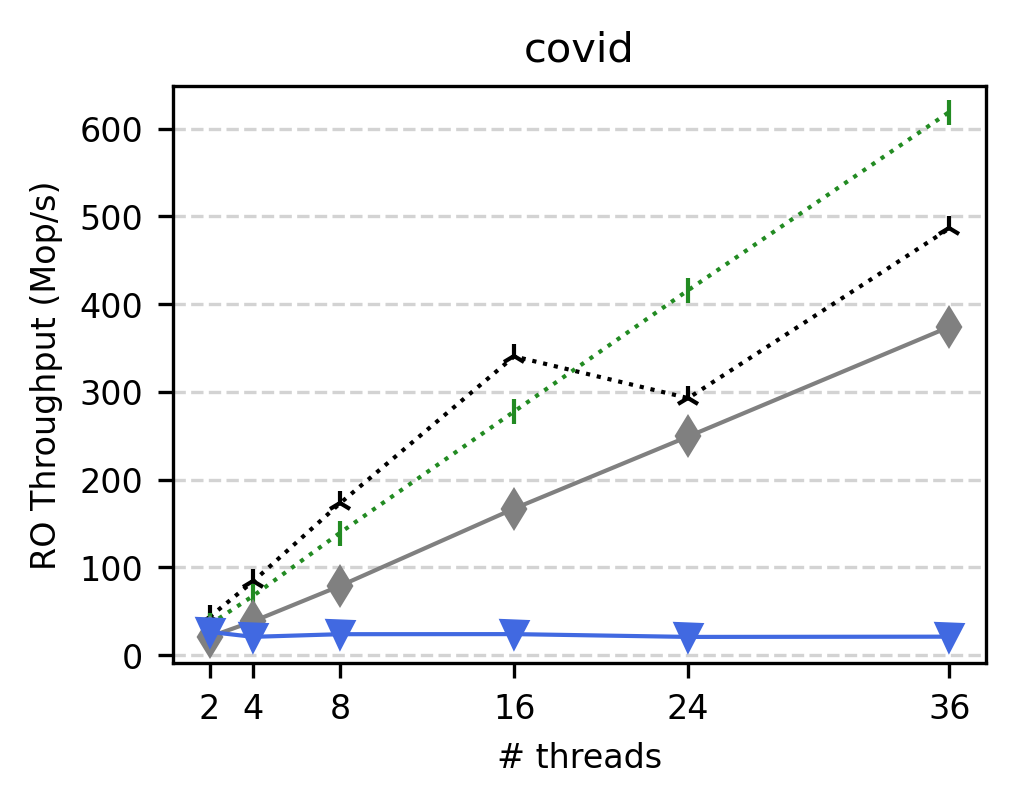

In [10]:
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 8
plt.figure(figsize=(3.5, 2.5), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
#     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

plt.xticks([2, 4, 8, 16, 24, 36], fontsize=fontsize)
plt.yticks([0, 100, 200, 300, 400, 500, 600], fontsize=fontsize)

# plt.ylim(top=200)

plt.xlabel('# threads', fontsize=fontsize)
plt.ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
plt.title('covid', fontsize=fontsize + 2)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.show()

In [11]:
df = preprocess()
df = df.loc[(df['dataset'] == 'libio') & (df['workload'] == 'RO')]

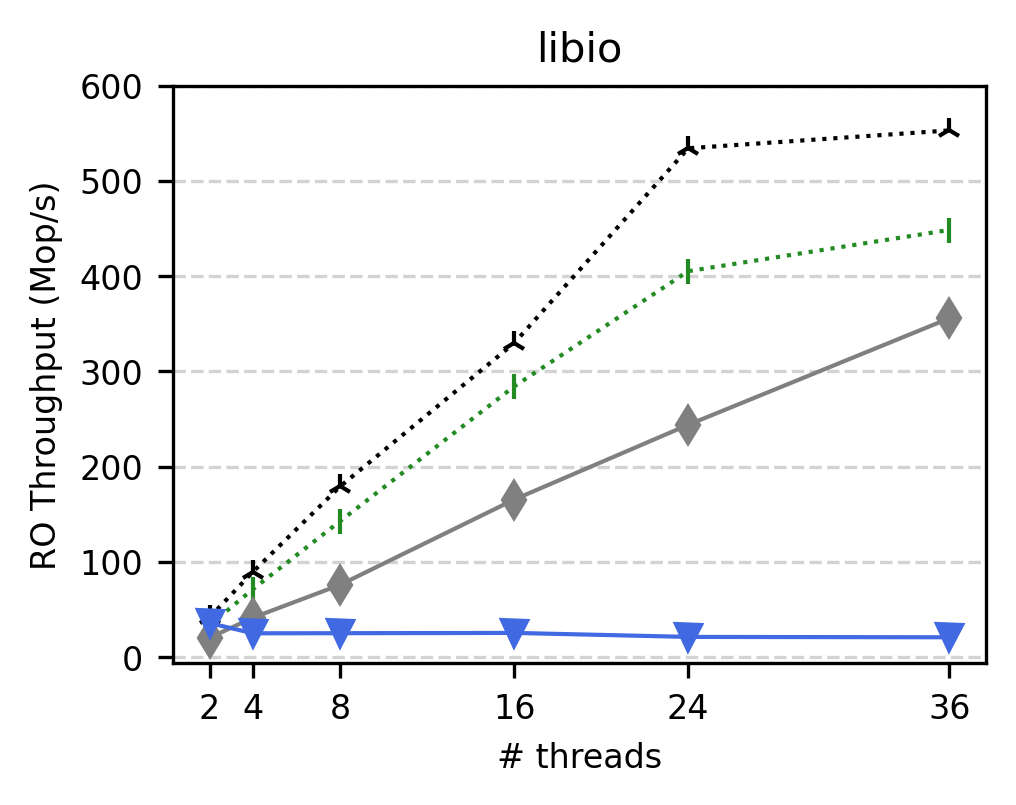

In [12]:
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 8
plt.figure(figsize=(3.5, 2.5), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
#     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

plt.xticks([2, 4, 8, 16, 24, 36], fontsize=fontsize)
plt.yticks([0, 100, 200, 300, 400, 500, 600], fontsize=fontsize)

# plt.ylim(top=200)

plt.xlabel('# threads', fontsize=fontsize)
plt.ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
plt.title('libio', fontsize=fontsize + 2)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.show()

In [13]:
df = preprocess()
df = df.loc[(df['dataset'] == 'genome') & (df['workload'] == 'RO')]

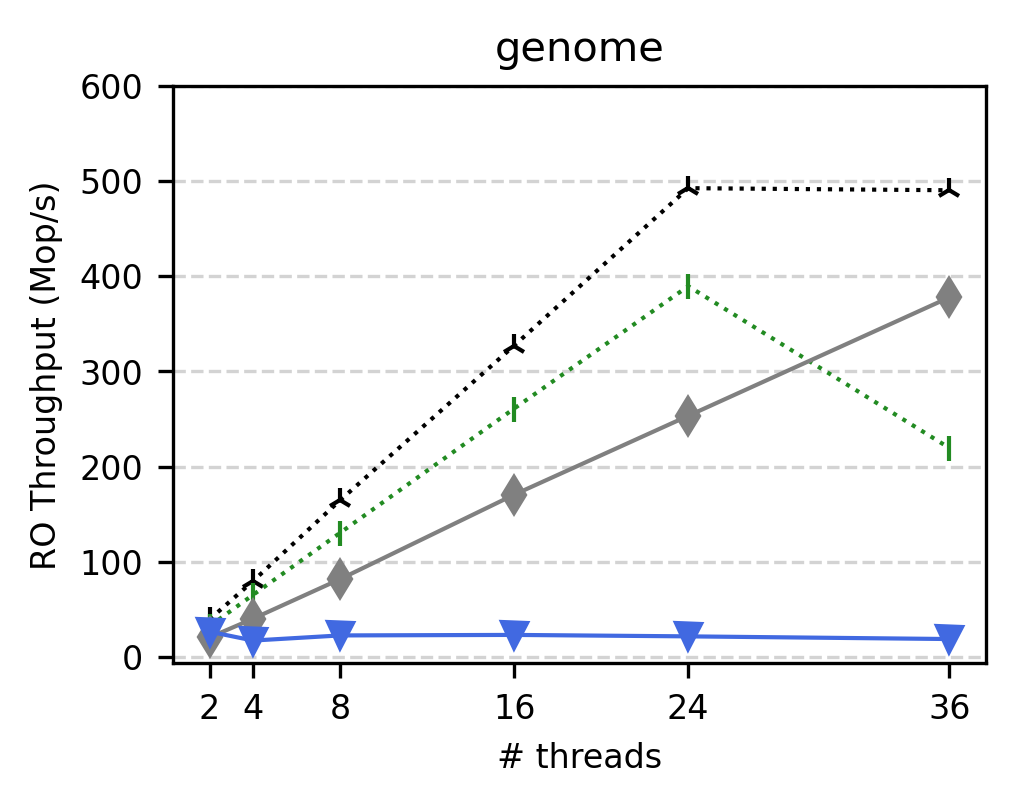

In [14]:
systems = ['btreeolc', 'masstree', 'xindex', 'alexol']
colors = ['black', 'forestgreen', 'gray', 'royalblue']
linestyles = ['dotted', 'dotted', '-', '-']
markers = ['2', '|', 'd', 'v']

df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 8
plt.figure(figsize=(3.5, 2.5), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
#     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

plt.xticks([2, 4, 8, 16, 24, 36], fontsize=fontsize)
plt.yticks([0, 100, 200, 300, 400, 500, 600], fontsize=fontsize)

# plt.ylim(top=200)

plt.xlabel('# threads', fontsize=fontsize)
plt.ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
plt.title('genome', fontsize=fontsize + 2)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.show()

In [15]:
df = preprocess()
df = df.loc[(df['dataset'] == 'osm') & (df['workload'] == 'RO')]

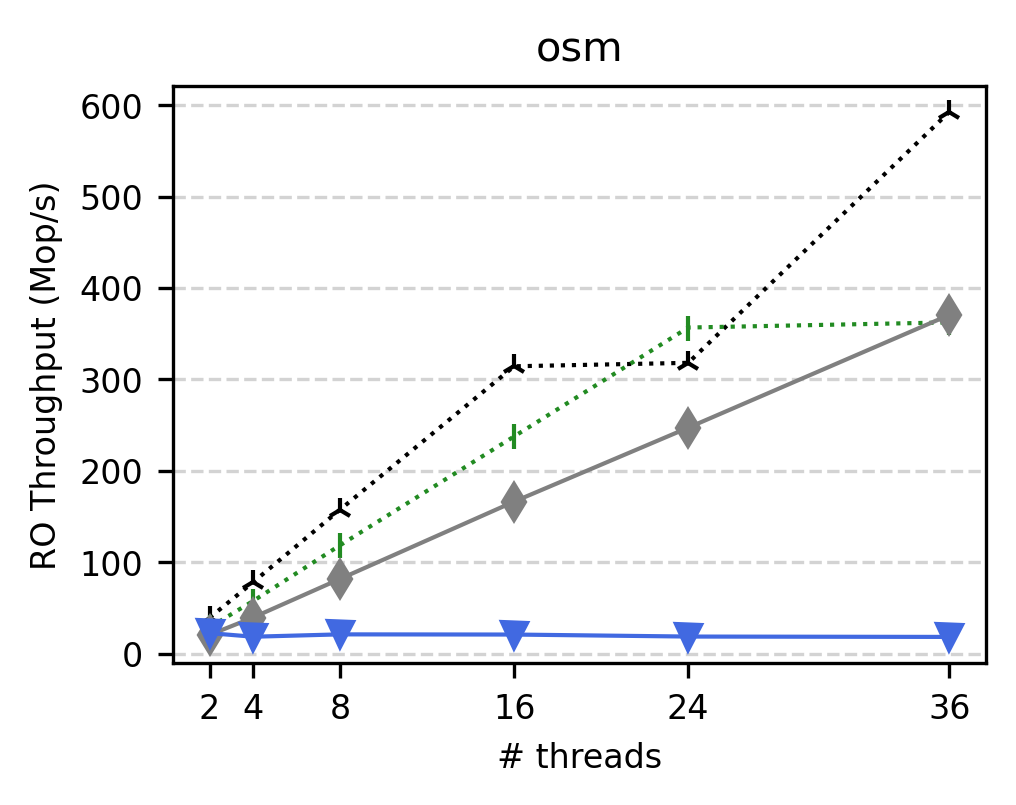

In [16]:
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 8
plt.figure(figsize=(3.5, 2.5), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
#     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

plt.xticks([2, 4, 8, 16, 24, 36], fontsize=fontsize)
plt.yticks([0, 100, 200, 300, 400, 500, 600], fontsize=fontsize)

# plt.ylim(top=200)

plt.xlabel('# threads', fontsize=fontsize)
plt.ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
plt.title('osm', fontsize=fontsize + 2)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.show()

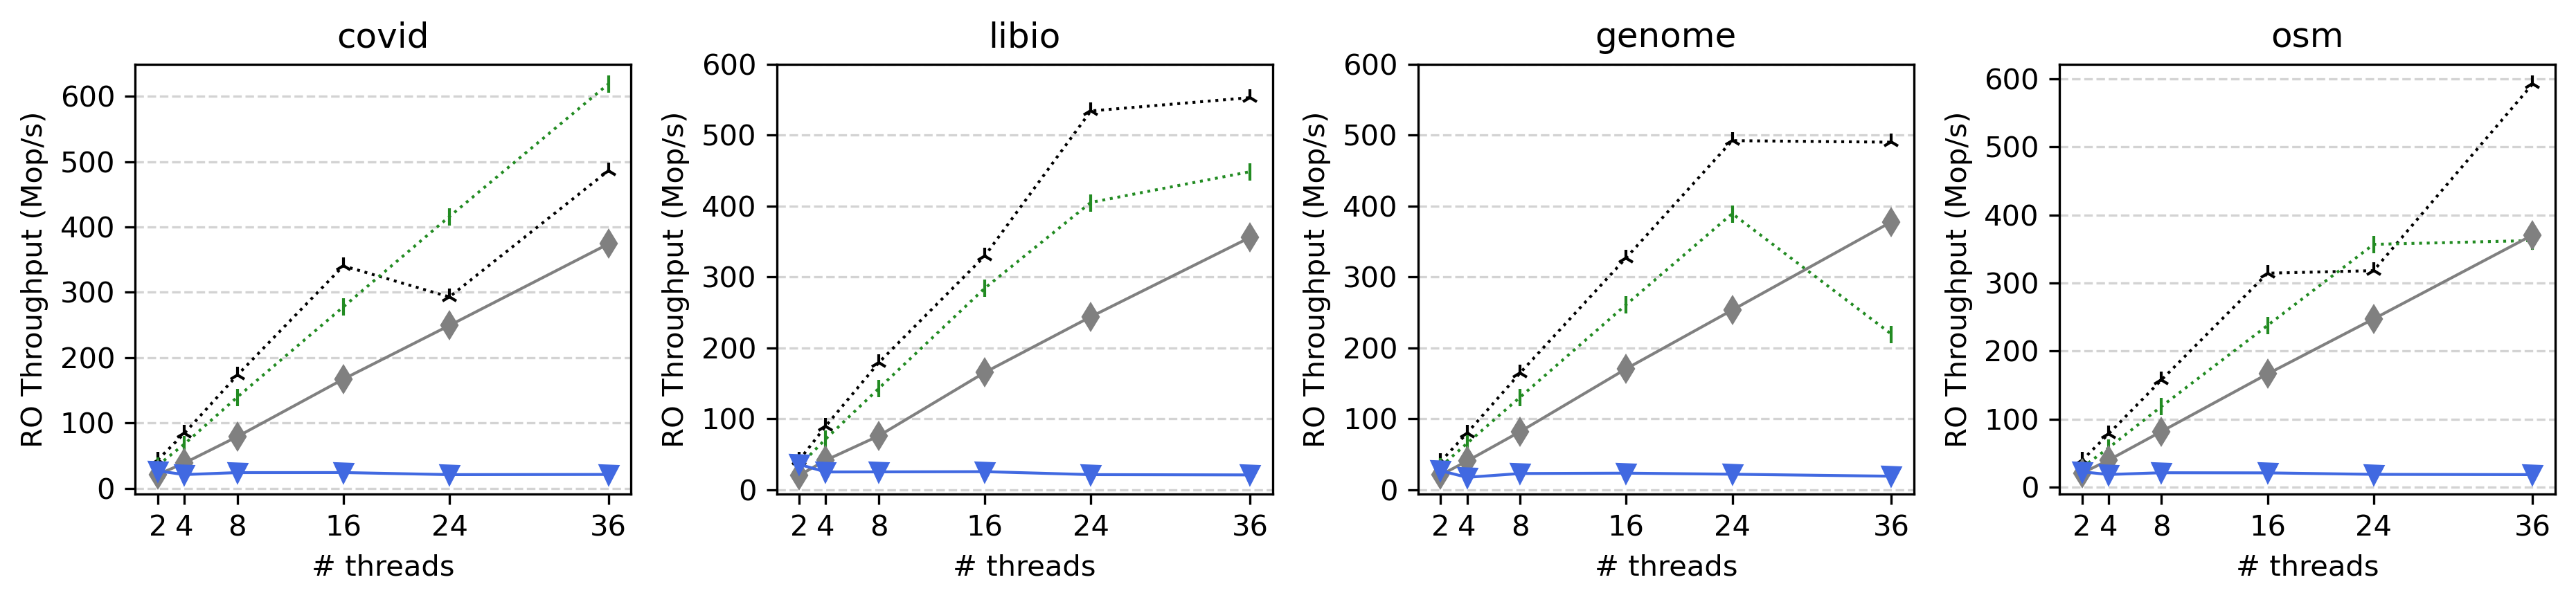

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ['covid', 'libio', 'genome', 'osm']

systems = ['btreeolc', 'masstree', 'xindex', 'alexol']
colors = ['black', 'forestgreen', 'gray', 'royalblue']
linestyles = ['dotted', 'dotted', '-', '-']
markers = ['2', '|', 'd', 'v']

fontsize = 9
fig, axes = plt.subplots(1, 4, figsize=(12.5, 3), dpi=300)

for j, dataset in enumerate(datasets):
    df = preprocess()
    df = df.loc[(df['dataset'] == dataset) & (df['workload'] == 'RO')]

    df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

    for i, system in enumerate(systems):
        system_data = df.loc[df['index_type'] == system]
        system_mean = df_mean.loc[df_mean['index_type'] == system]
        axes[j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
    #     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

    axes[j].set_xticks([2, 4, 8, 16, 24, 36])
    axes[j].set_yticks([0, 100, 200, 300, 400, 500, 600])

    axes[j].set_xlabel('# threads', fontsize=fontsize+1)
    axes[j].set_ylabel('RO Throughput (Mop/s)', fontsize=fontsize+1)
    axes[j].set_title(dataset, fontsize=fontsize + 3)
    axes[j].grid(axis='y', linestyle='--', color='lightgrey')

plt.tight_layout()
plt.show()


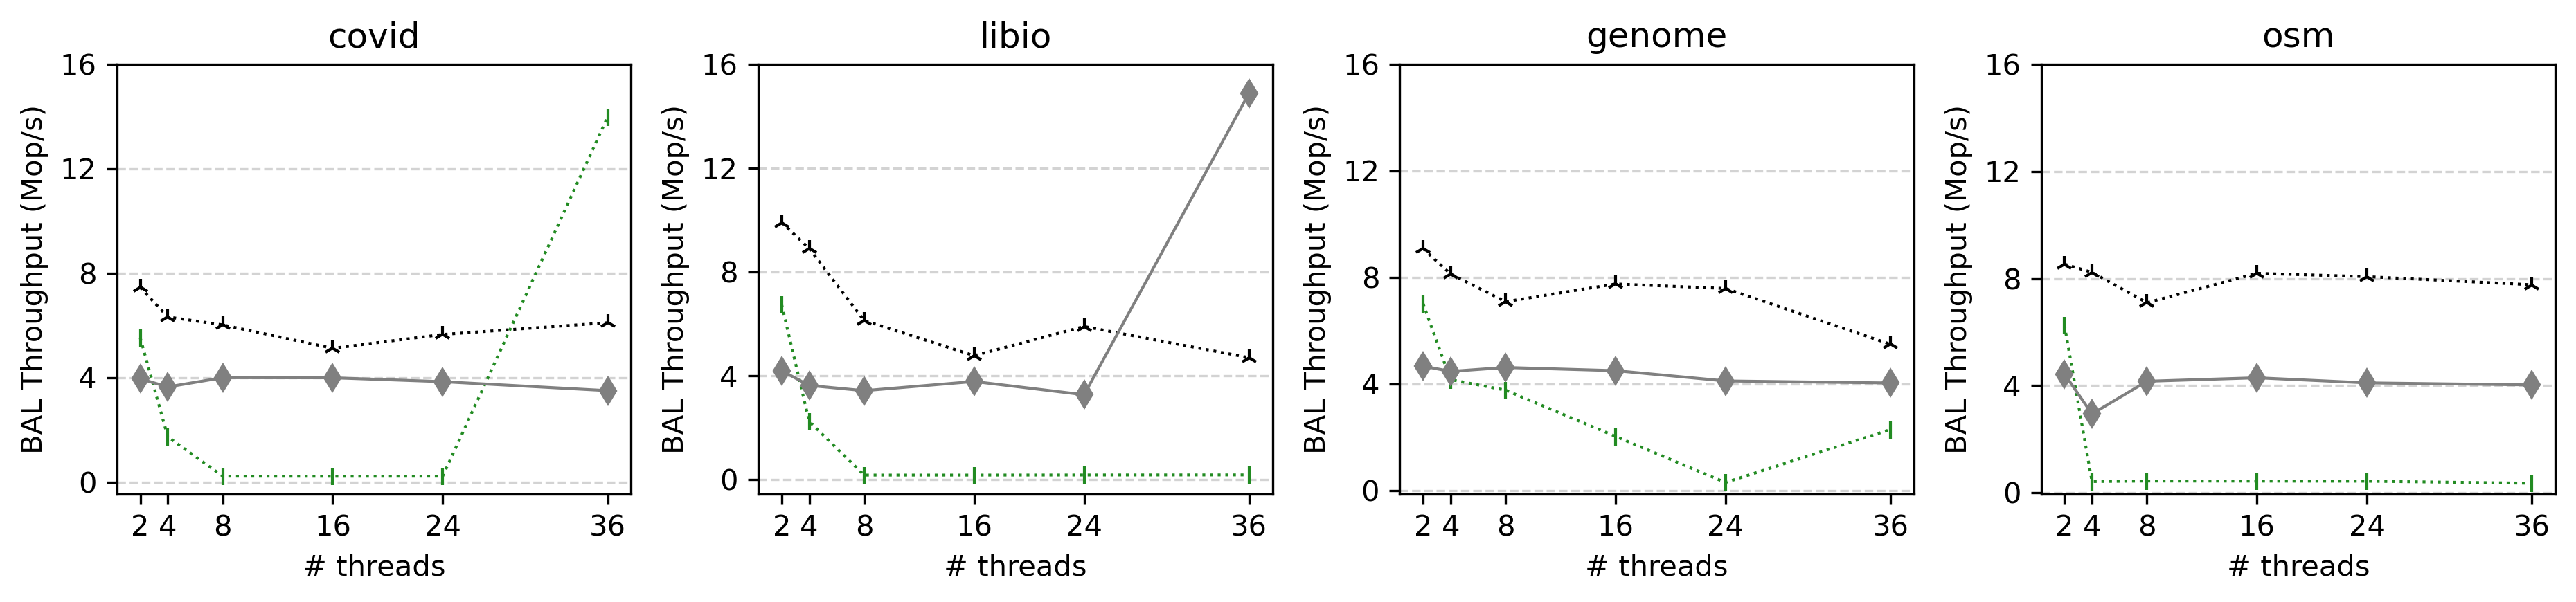

In [18]:
fontsize = 9
fig, axes = plt.subplots(1, 4, figsize=(12.5, 3), dpi=300)

for j, dataset in enumerate(datasets):
    df = preprocess()
    df = df.loc[(df['dataset'] == dataset) & (df['workload'] == 'BAL')]

    df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

    for i, system in enumerate(systems):
        system_data = df.loc[df['index_type'] == system]
        system_mean = df_mean.loc[df_mean['index_type'] == system]
        axes[j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
    #     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

    axes[j].set_xticks([2, 4, 8, 16, 24, 36])
    axes[j].set_yticks([0, 4, 8, 12, 16])

    axes[j].set_xlabel('# threads', fontsize=fontsize+1)
    axes[j].set_ylabel('BAL Throughput (Mop/s)', fontsize=fontsize+1)
    axes[j].set_title(dataset, fontsize=fontsize + 3)
    axes[j].grid(axis='y', linestyle='--', color='lightgrey')

plt.tight_layout()
plt.show()


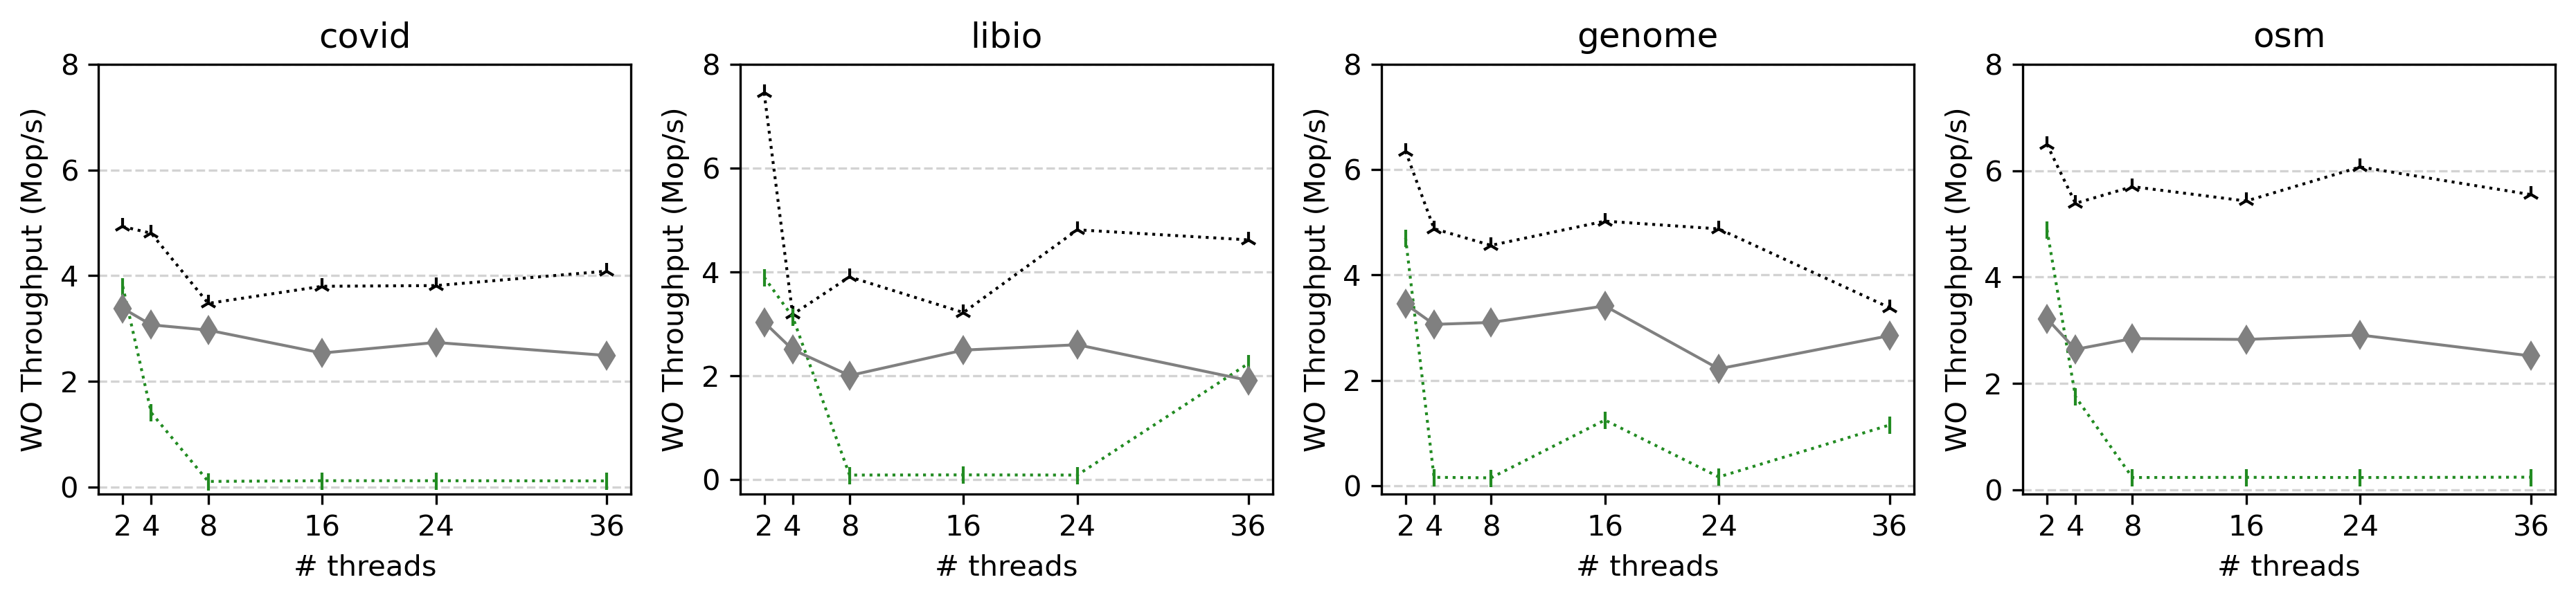

In [19]:
fontsize = 9
fig, axes = plt.subplots(1, 4, figsize=(12.5, 3), dpi=300)

for j, dataset in enumerate(datasets):
    df = preprocess()
    df = df.loc[(df['dataset'] == dataset) & (df['workload'] == 'WO')]

    df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

    for i, system in enumerate(systems):
        system_data = df.loc[df['index_type'] == system]
        system_mean = df_mean.loc[df_mean['index_type'] == system]
        axes[j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
    #     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

    axes[j].set_xticks([2, 4, 8, 16, 24, 36])
    axes[j].set_yticks([0, 2, 4, 6, 8])

    axes[j].set_xlabel('# threads', fontsize=fontsize+1)
    axes[j].set_ylabel('WO Throughput (Mop/s)', fontsize=fontsize+1)
    axes[j].set_title(dataset, fontsize=fontsize + 3)
    axes[j].grid(axis='y', linestyle='--', color='lightgrey')

plt.tight_layout()
plt.show()

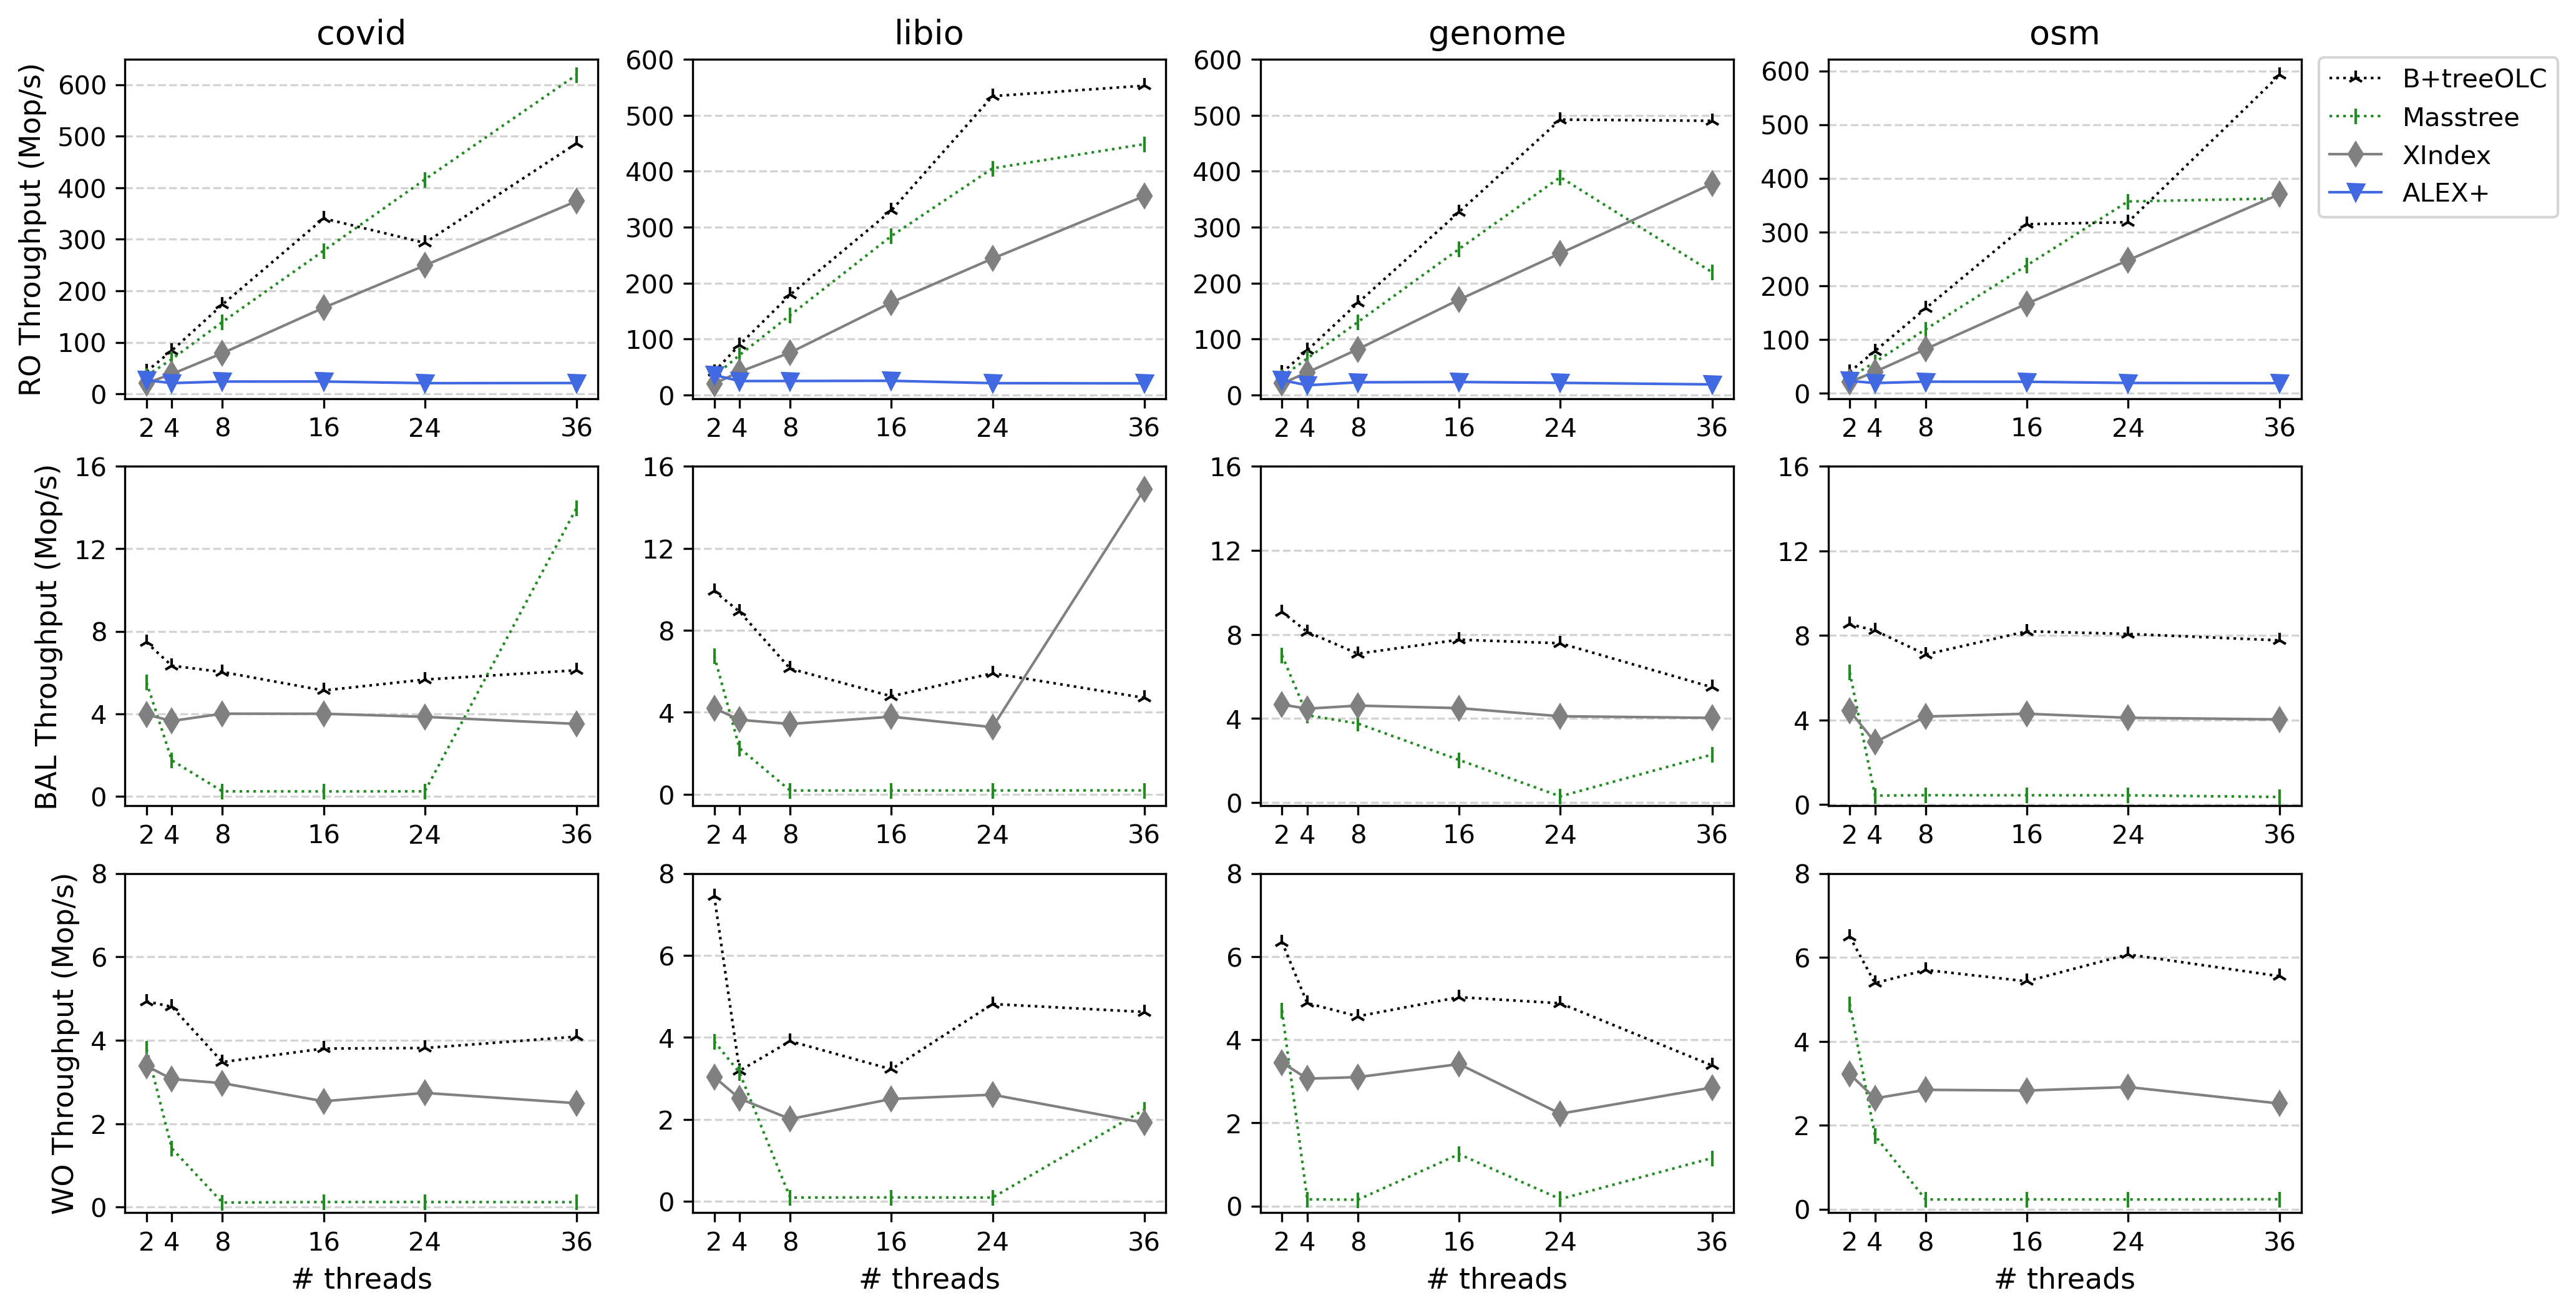

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ['covid', 'libio', 'genome', 'osm']
workloads = ['RO', 'BAL', 'WO']
yticks_list = [[0, 100, 200, 300, 400, 500, 600], [0, 4, 8, 12, 16], [0, 2, 4, 6, 8]]
xticks = [2, 4, 8, 16, 24, 36]

systems = ['btreeolc', 'masstree', 'xindex', 'alexol']
colors = ['black', 'forestgreen', 'gray', 'royalblue']
linestyles = ['dotted', 'dotted', '-', '-']
markers = ['2', '|', 'd', 'v']
system_labels = ['B+treeOLC', 'Masstree', 'XIndex', 'ALEX+']

fontsize = 10
fig, axes = plt.subplots(3, 4, figsize=(15, 8), dpi=300)

for i, workload in enumerate(workloads):
    for j, dataset in enumerate(datasets):
        df = preprocess()
        df = df.loc[(df['dataset'] == dataset) & (df['workload'] == workload)]

        df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

        for k, system in enumerate(systems):
            system_data = df.loc[df['index_type'] == system]
            system_mean = df_mean.loc[df_mean['index_type'] == system]
            axes[i, j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[k], markersize=6, linewidth=1, color=colors[k], linestyle=linestyles[k], label=system_labels[k])

        axes[i, j].set_yticks(yticks_list[i])

        if i == 0:
            axes[i, j].set_title(dataset, fontsize=fontsize + 3)

        if j == 0:
            axes[i, j].set_ylabel(workload + ' Throughput (Mop/s)', fontsize=fontsize + 1)

        if i == 2:  
            axes[i, j].set_xlabel('# threads', fontsize=fontsize + 1)

        axes[i, j].set_xticks(xticks)
        axes[i, j].grid(axis='y', linestyle='--', color='lightgrey')
        
        if i == 2 and j == 3:  
            axes[i, j].legend(loc='center left', bbox_to_anchor=(1.01, 3.17))



plt.tight_layout()
plt.savefig('fig5.png', bbox_inches='tight', dpi=300)
plt.show()

In [21]:
concurrent_alex_df = pd.read_csv('../../concurrent-learned-index/gre_benchmark_1.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
concurrent_alex_df['dataset'] = concurrent_alex_df['key_path'].apply(lambda x: x.split('/')[-1])
concurrent_alex_df['workload'] = concurrent_alex_df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
concurrent_alex_df['throughput'] = concurrent_alex_df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
concurrent_alex_df = concurrent_alex_df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
concurrent_alex_df = concurrent_alex_df.sort_values(by=['workload', 'dataset', 'index_type', '# threads']).reset_index(drop=True)
concurrent_alex_df['index_type'] = 'Concurrent ALEX'
concurrent_alex_df

,workload,dataset,index_type,# threads,throughput
0,BAL,covid,Concurrent ALEX,2,2.59
1,BAL,covid,Concurrent ALEX,2,2.60
2,BAL,covid,Concurrent ALEX,2,2.65
3,BAL,covid,Concurrent ALEX,4,1.80
4,BAL,covid,Concurrent ALEX,4,1.80
...,...,...,...,...,...
159,WO,libio,Concurrent ALEX,24,2.21
160,WO,libio,Concurrent ALEX,24,2.24
161,WO,libio,Concurrent ALEX,36,2.32
162,WO,libio,Concurrent ALEX,36,2.34


In [22]:
df = preprocess()
df = pd.concat([df, concurrent_alex_df], ignore_index=True)
df

,workload,dataset,index_type,# threads,throughput
0,BAL,covid,btreeolc,2,7.98
1,BAL,covid,btreeolc,2,6.83
2,BAL,covid,btreeolc,2,7.56
3,BAL,covid,btreeolc,4,7.69
4,BAL,covid,btreeolc,4,5.19
...,...,...,...,...,...
1113,WO,libio,Concurrent ALEX,24,2.21
1114,WO,libio,Concurrent ALEX,24,2.24
1115,WO,libio,Concurrent ALEX,36,2.32
1116,WO,libio,Concurrent ALEX,36,2.34


In [23]:
systems = ['btreeolc', 'masstree', 'xindex', 'alexol', 'Concurrent ALEX']
colors = ['black', 'forestgreen', 'gray', 'royalblue', 'orange']
linestyles = ['dotted', 'dotted', '-', '-', '-']
markers = ['2', '|', 'd', 'v', 'o']

In [24]:
df = df.loc[(df['dataset'] == 'covid') & (df['workload'] == 'RO')]
df

,workload,dataset,index_type,# threads,throughput
306,RO,covid,alexol,2,26.31
307,RO,covid,alexol,2,26.50
308,RO,covid,alexol,2,26.74
309,RO,covid,alexol,4,25.31
310,RO,covid,alexol,4,18.57
...,...,...,...,...,...
1021,RO,covid,Concurrent ALEX,24,2.64
1022,RO,covid,Concurrent ALEX,24,2.67
1023,RO,covid,Concurrent ALEX,36,2.79
1024,RO,covid,Concurrent ALEX,36,2.62


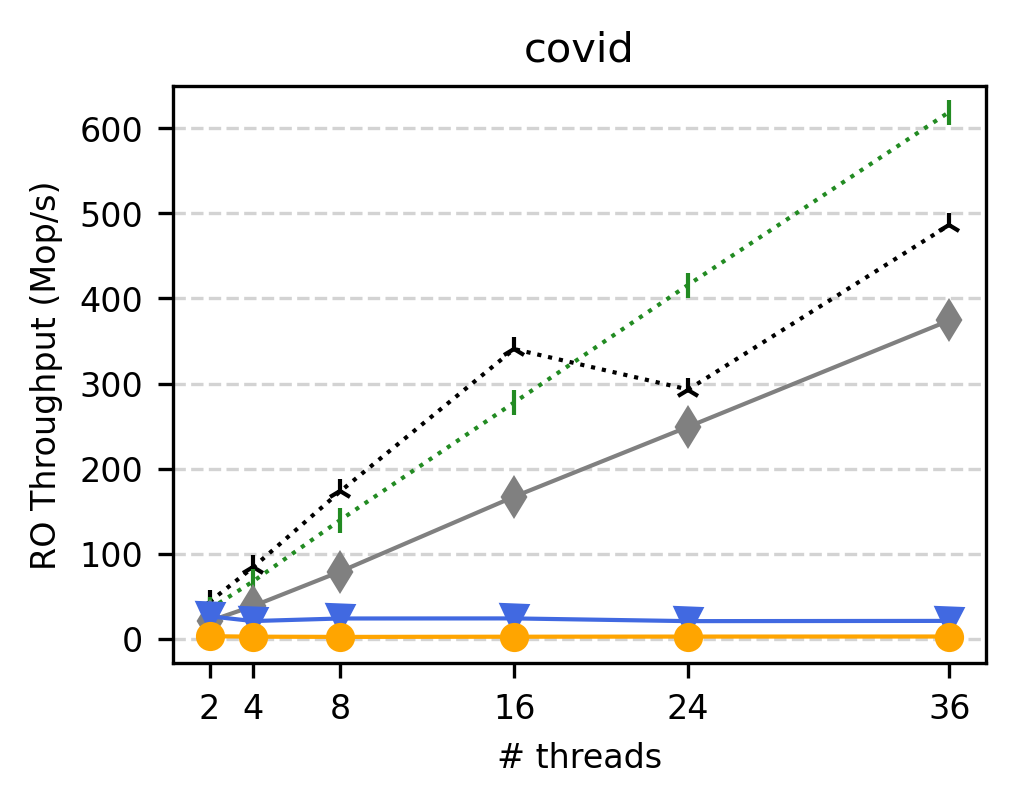

In [25]:
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 8
plt.figure(figsize=(3.5, 2.5), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
#     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

plt.xticks([2, 4, 8, 16, 24, 36], fontsize=fontsize)
plt.yticks([0, 100, 200, 300, 400, 500, 600], fontsize=fontsize)

# plt.ylim(top=200)

plt.xlabel('# threads', fontsize=fontsize)
plt.ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
plt.title('covid', fontsize=fontsize + 2)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.show()

In [26]:
def preprocess_alongside_concurrent_alex():
    concurrent_alex_df = pd.read_csv('../../concurrent-learned-index/gre_benchmark_1.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
    concurrent_alex_df['dataset'] = concurrent_alex_df['key_path'].apply(lambda x: x.split('/')[-1])
    concurrent_alex_df['workload'] = concurrent_alex_df['read_ratio'].apply(lambda x: 
            'RO' if x == 1.0 else 
            'BAL' if x == 0.5 else 
            'WO' if x == 0.0 else None)
    concurrent_alex_df['throughput'] = concurrent_alex_df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
    concurrent_alex_df = concurrent_alex_df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
    concurrent_alex_df = concurrent_alex_df.sort_values(by=['workload', 'dataset', 'index_type', '# threads']).reset_index(drop=True)
    concurrent_alex_df['index_type'] = 'Concurrent ALEX'

    df = preprocess()
    df = pd.concat([df, concurrent_alex_df], ignore_index=True)
    return df

In [27]:
systems = ['alexol', 'Concurrent ALEX']
colors = ['royalblue', 'orange']
linestyles = ['-', '-']
markers = ['v', 'o']

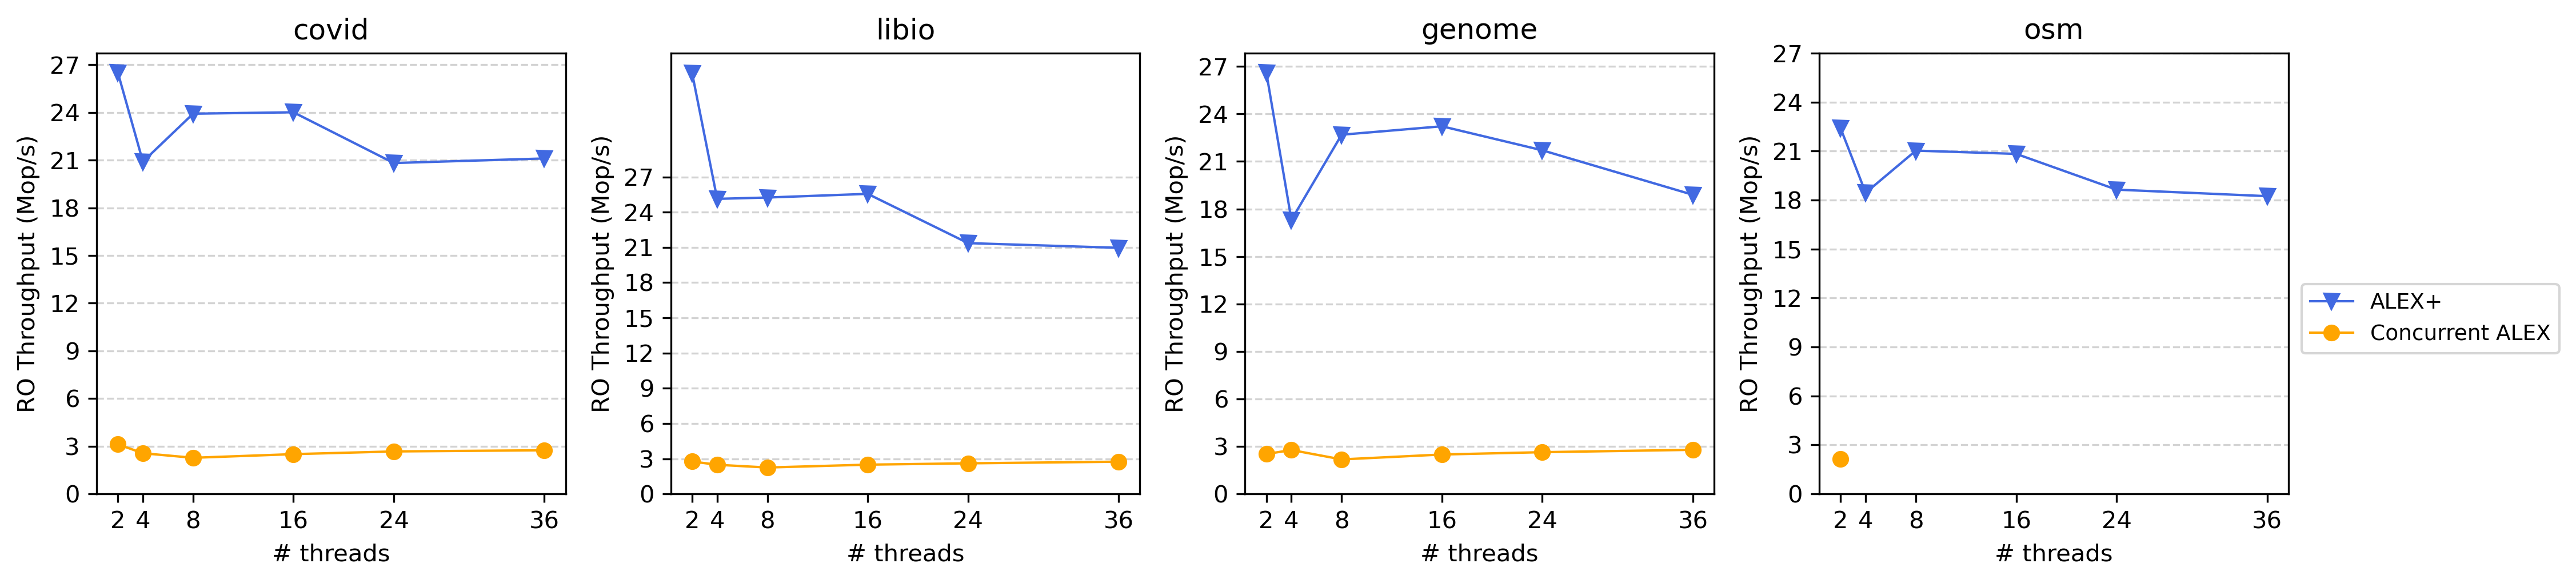

In [28]:
fontsize = 9
fig, axes = plt.subplots(1, 4, figsize=(15, 3.5), dpi=300)

for j, dataset in enumerate(datasets):
    df = preprocess_alongside_concurrent_alex()
    df = df.loc[(df['dataset'] == dataset) & (df['workload'] == 'RO')]

    df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

    for i, system in enumerate(systems):
        system_data = df.loc[df['index_type'] == system]
        system_mean = df_mean.loc[df_mean['index_type'] == system]
        axes[j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
    #     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

    axes[j].set_xticks([2, 4, 8, 16, 24, 36])
    axes[j].set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24, 27])

    axes[j].set_xlabel('# threads', fontsize=fontsize+1)
    axes[j].set_ylabel('RO Throughput (Mop/s)', fontsize=fontsize+1)
    axes[j].set_title(dataset, fontsize=fontsize + 3)
    axes[j].grid(axis='y', linestyle='--', color='lightgrey')

plt.legend(labels=['ALEX+', 'Concurrent ALEX'], fontsize=fontsize, bbox_to_anchor=(1.6, 0.5)) 
plt.tight_layout()
plt.savefig('alex_plus_vs_concurrent_alex.png', bbox_inches='tight', dpi=300)
plt.show()

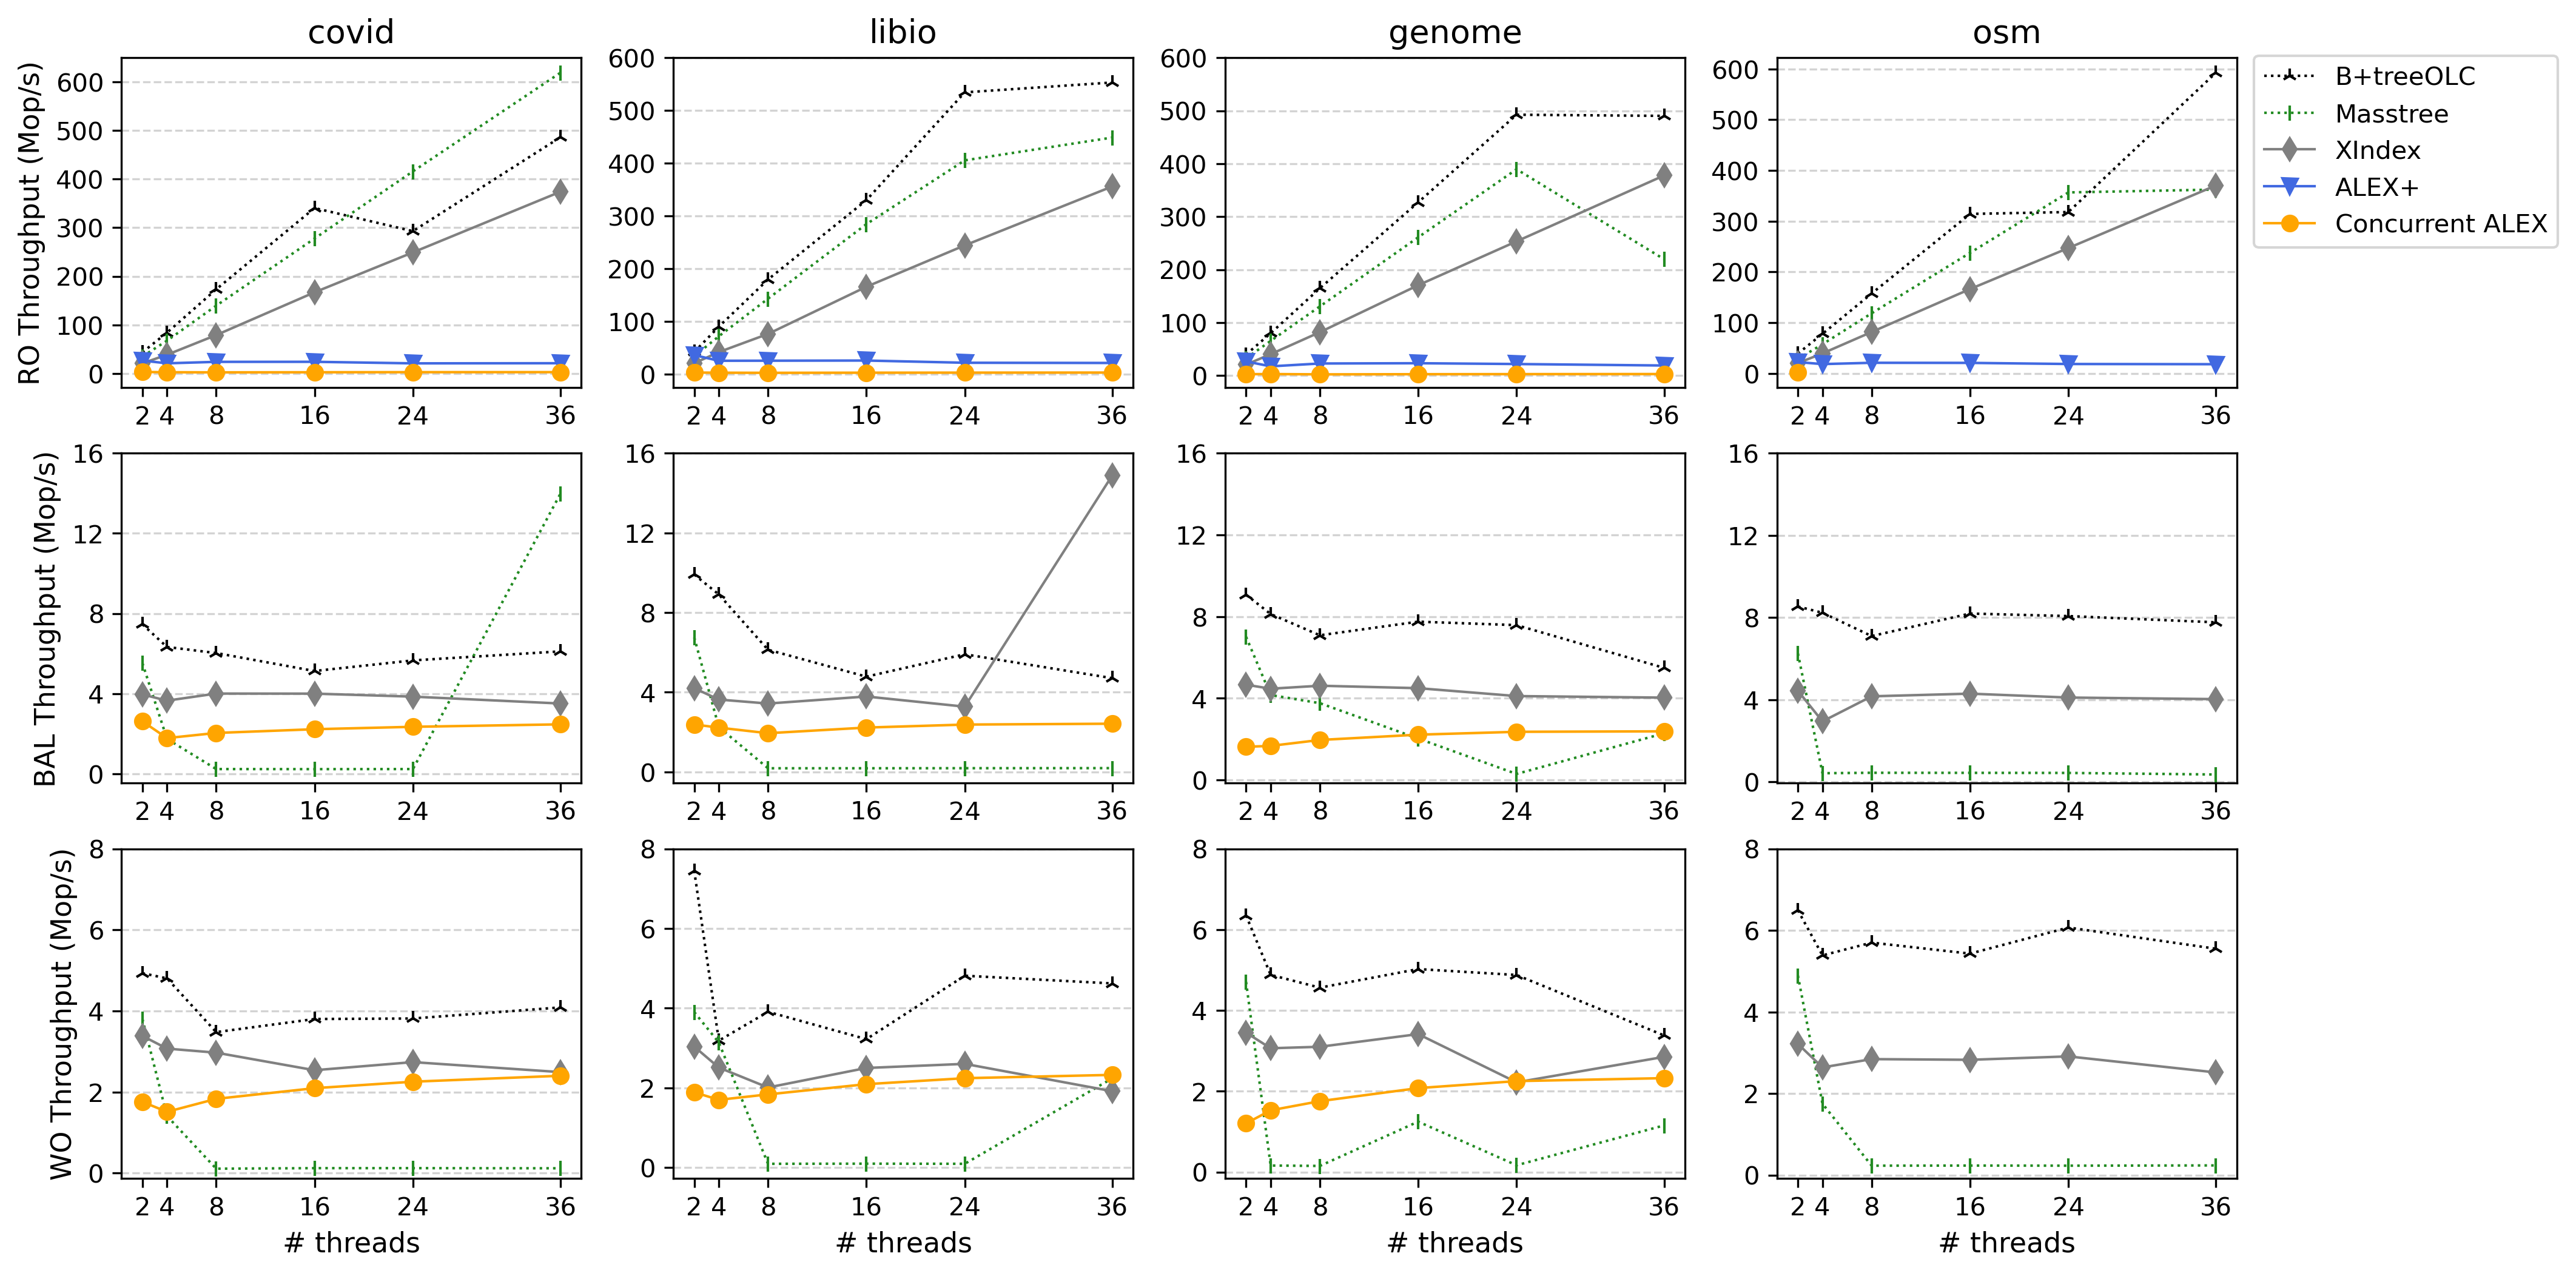

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ['covid', 'libio', 'genome', 'osm']
workloads = ['RO', 'BAL', 'WO']
yticks_list = [[0, 100, 200, 300, 400, 500, 600], [0, 4, 8, 12, 16], [0, 2, 4, 6, 8]]
xticks = [2, 4, 8, 16, 24, 36]

systems = ['btreeolc', 'masstree', 'xindex', 'alexol', 'Concurrent ALEX']
colors = ['black', 'forestgreen', 'gray', 'royalblue', 'orange']
linestyles = ['dotted', 'dotted', '-', '-', '-']
markers = ['2', '|', 'd', 'v', 'o']
system_labels = ['B+treeOLC', 'Masstree', 'XIndex', 'ALEX+', 'Concurrent ALEX']

fontsize = 10
fig, axes = plt.subplots(3, 4, figsize=(15, 8), dpi=300)

for i, workload in enumerate(workloads):
    for j, dataset in enumerate(datasets):
        df = preprocess_alongside_concurrent_alex()
        df = df.loc[(df['dataset'] == dataset) & (df['workload'] == workload)]

        df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

        for k, system in enumerate(systems):
            system_data = df.loc[df['index_type'] == system]
            system_mean = df_mean.loc[df_mean['index_type'] == system]
            axes[i, j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[k], markersize=6, linewidth=1, color=colors[k], linestyle=linestyles[k], label=system_labels[k])

        axes[i, j].set_yticks(yticks_list[i])

        if i == 0:
            axes[i, j].set_title(dataset, fontsize=fontsize + 3)

        if j == 0:
            axes[i, j].set_ylabel(workload + ' Throughput (Mop/s)', fontsize=fontsize + 1)

        if i == 2:  
            axes[i, j].set_xlabel('# threads', fontsize=fontsize + 1)

        axes[i, j].set_xticks(xticks)
        axes[i, j].grid(axis='y', linestyle='--', color='lightgrey')
        
        if i == 2 and j == 3:  
            axes[i, j].legend(loc='center left', bbox_to_anchor=(1.01, 3.115))



plt.tight_layout()
plt.savefig('fig5_with_concurrent_alex.png', bbox_inches='tight', dpi=300)
plt.show()